In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Desktop/beatles_spotify.csv',index_col=0)
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,1,1u2yF3CsOvVOMP82AgP2gJ,spotify:track:1u2yF3CsOvVOMP82AgP2gJ,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,57,158266
1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,2,1Oo6F5Dn1s8hrUDUQuoCqB,spotify:track:1Oo6F5Dn1s8hrUDUQuoCqB,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,62,126466
2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,3,7sNSyrCw3F7qnMpl938JUZ,spotify:track:7sNSyrCw3F7qnMpl938JUZ,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,57,180320
3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,4,0NT88kD8fIXuwBOuXlPcmx,spotify:track:0NT88kD8fIXuwBOuXlPcmx,0.70600,0.460,0.600,0.000042,0.063,-9.108,0.0472,124.210,0.679,54,179866
4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,5,47gNXRKcBJxu6bOvmyUroI,spotify:track:47gNXRKcBJxu6bOvmyUroI,0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,55,144906


In [6]:
df.drop(columns=['track_number','id','uri'],inplace=True)
df.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,57,158266
1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,62,126466
2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,57,180320
3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.70600,0.460,0.600,0.000042,0.063,-9.108,0.0472,124.210,0.679,54,179866
4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,55,144906


In [7]:
df['duration'] = df['duration_ms'] // 1000
df.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration
0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,57,158266,158
1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,62,126466,126
2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,57,180320,180
3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.70600,0.460,0.600,0.000042,0.063,-9.108,0.0472,124.210,0.679,54,179866,179
4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,55,144906,144


In [8]:
df.drop(columns='duration_ms',inplace=True)
df.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,57,158
1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,62,126
2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,57,180
3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.70600,0.460,0.600,0.000042,0.063,-9.108,0.0472,124.210,0.679,54,179
4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,55,144


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 674
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              675 non-null    object 
 1   album             675 non-null    object 
 2   release_date      675 non-null    object 
 3   acousticness      675 non-null    float64
 4   danceability      675 non-null    float64
 5   energy            675 non-null    float64
 6   instrumentalness  675 non-null    float64
 7   liveness          675 non-null    float64
 8   loudness          675 non-null    float64
 9   speechiness       675 non-null    float64
 10  tempo             675 non-null    float64
 11  valence           675 non-null    float64
 12  popularity        675 non-null    int64  
 13  duration          675 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 79.1+ KB


In [10]:
df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,0.405256,0.532309,0.522586,0.068203,0.251490,-10.416490,0.090423,120.405055,0.607886,38.521481,165.585185
std,0.314677,0.151987,0.205235,0.194286,0.210163,3.521142,0.166669,29.128978,0.250788,15.814599,75.017939
min,0.000023,0.000000,0.012400,0.000000,0.037100,-27.456000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,0.097300,0.424000,0.372500,0.000000,0.107000,-11.758000,0.033300,98.711000,0.401000,27.000000,129.000000
50%,0.352000,0.534000,0.530000,0.000010,0.164000,-9.827000,0.041300,121.509000,0.648000,39.000000,158.000000
75%,0.696500,0.634500,0.668000,0.001690,0.320000,-8.159000,0.063950,136.677000,0.810000,50.000000,194.000000
max,0.994000,0.915000,0.969000,0.942000,0.948000,-3.199000,0.954000,209.242000,0.980000,81.000000,970.000000


In [14]:
df['rating'] = 1 - (df['popularity']-1)/80
df.drop(columns='popularity', inplace=True)
df.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,rating
0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,158,0.3000
1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,126,0.2375
2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,180,0.3000
3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,0.70600,0.460,0.600,0.000042,0.063,-9.108,0.0472,124.210,0.679,179,0.3375
4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,144,0.3250


In [15]:
df.drop(columns=['album','release_date'],inplace=True)
df.head()

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,rating
0,Taxman - 2022 Mix,0.00225,0.484,0.771,0.000000,0.718,-6.151,0.1300,133.603,0.679,158,0.3000
1,Eleanor Rigby - 2022 Mix,0.85300,0.606,0.304,0.000000,0.340,-7.485,0.0414,137.891,0.808,126,0.2375
2,I'm Only Sleeping - 2022 Mix,0.09440,0.559,0.479,0.000000,0.269,-7.890,0.0281,103.392,0.658,180,0.3000
3,Love You To - 2022 Mix,0.70600,0.460,0.600,0.000042,0.063,-9.108,0.0472,124.210,0.679,179,0.3375
4,"Here, There And Everywhere - 2022 Mix",0.87000,0.345,0.304,0.000031,0.116,-9.477,0.0297,164.568,0.425,144,0.3250


In [16]:
df.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,rating
acousticness,1.000000,0.091278,-0.620794,0.020193,-0.116593,-0.532298,0.295328,-0.052994,-0.168972,-0.151473,0.227347
danceability,0.091278,1.000000,-0.097027,-0.080194,-0.177667,-0.111873,0.223685,-0.100815,0.355266,-0.268672,0.122818
energy,-0.620794,-0.097027,1.000000,-0.053633,0.269390,0.721105,-0.269710,0.142967,0.382475,0.024772,-0.172524
instrumentalness,0.020193,-0.080194,-0.053633,1.000000,0.000857,-0.098127,-0.068302,0.002839,-0.261725,-0.000200,0.022905
liveness,-0.116593,-0.177667,0.269390,0.000857,1.000000,0.068667,0.087978,-0.098338,0.012427,-0.040369,0.093430
loudness,-0.532298,-0.111873,0.721105,-0.098127,0.068667,1.000000,-0.552603,0.173845,0.217121,0.151092,-0.367119
speechiness,0.295328,0.223685,-0.269710,-0.068302,0.087978,-0.552603,1.000000,-0.096675,0.090232,-0.265197,0.376830
tempo,-0.052994,-0.100815,0.142967,0.002839,-0.098338,0.173845,-0.096675,1.000000,0.086882,0.036058,-0.095312
valence,-0.168972,0.355266,0.382475,-0.261725,0.012427,0.217121,0.090232,0.086882,1.000000,-0.355506,-0.042571
duration,-0.151473,-0.268672,0.024772,-0.000200,-0.040369,0.151092,-0.265197,0.036058,-0.355506,1.000000,-0.138950


<AxesSubplot:xlabel='speechiness', ylabel='rating'>

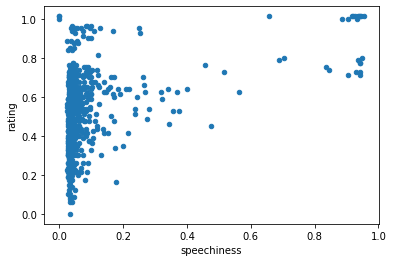

In [23]:
df.plot(x='speechiness',y='rating', kind='scatter')

<AxesSubplot:xlabel='loudness', ylabel='rating'>

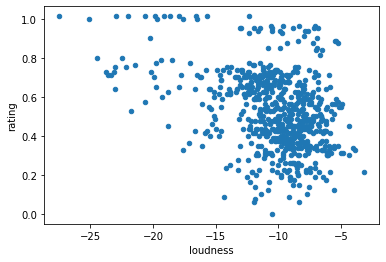

In [22]:
df.plot(x='loudness', y='rating', kind='scatter')